# DECISSION TREE CLASSIFIER

I am going to use a dataset from kaggle: kaggle.com/uciml/breast-cancer-wisconsin-data to show how implement a decission tree classifier

A decission tree is a predicted model based in diferent rules to achieve a result. These rules could be based in different ways but in this notebook I am going to use the Shannon Entropy, which measure the uncertainty of a variable. A decission tree is quite visual and less cost computational.

If you want to know more about Shannon Entropy you could read this paper doi.org/10.1016/j.nuclphysb.2018.04.003 based on the entropy applied to the decay ratios of a particle desintegration.

Let's to know more about the dataset

In [1]:
from IPython.core.display import Image
import warnings
warnings.filterwarnings('ignore')

import pydotplus
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cancer_df = pd.read_csv('resources/breast-cancer-wisconsin.csv')
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cols_cds = list(cancer_df.columns)
print('Drop the column...')
cols_cds.pop(len(cols_cds)-1)

Drop the column...


'Unnamed: 32'

In [4]:
cancer_df = cancer_df[cols_cds]
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
def is_repeated_key_columns(df, keys):
    
    '''
    This function checks if keys from a dataframe are repeated
    
    :param df: Dataframe to use
    :para keys: List of key columns of the dataframe
    :return True if has repeated values or False if not.
    '''
    
    if (not isinstance(df, pd.DataFrame) and not isinstance(keys, list)):
        raise ValueError('df variable must be a pandas dataframe and keys must be a list')
    df_k = df[keys]
    df_k_aux = df[keys].drop_duplicates(subset=keys)
    if df_k.shape[0] != df_k_aux.shape[0]:
        return True
    else:
        return False

In [6]:
print('There are any NaN values?:', cancer_df.isnull().values.any())
print('There are repeated values in col id?:', is_repeated_key_columns(df=cancer_df, keys=['id']))

There are any NaN values?: False
There are repeated values in col id?: False


Column 'id' is the key column and the 'diagnosis' is the target, so I have to set as index the first and take the second.

In [7]:
cancer_df = cancer_df.set_index('id')

In [8]:
cancer_df_t = cancer_df['diagnosis'].to_frame()
cancer_df = cancer_df.drop('diagnosis', axis=1)

Making the model

In [9]:
x_tr, x_te, y_tr, y_te = train_test_split(cancer_df, cancer_df_t, test_size=0.3, random_state=32)

dec_tree = DecisionTreeClassifier(criterion='entropy')
dec_tree.fit(x_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
print('Accuracy for training: {:0.2f}'.format(dec_tree.score(x_tr, y_tr)))
print('Accuracy for test: {:0.2f}'.format(dec_tree.score(x_te, y_te)))

Accuracy for training: 1.00
Accuracy for test: 0.92


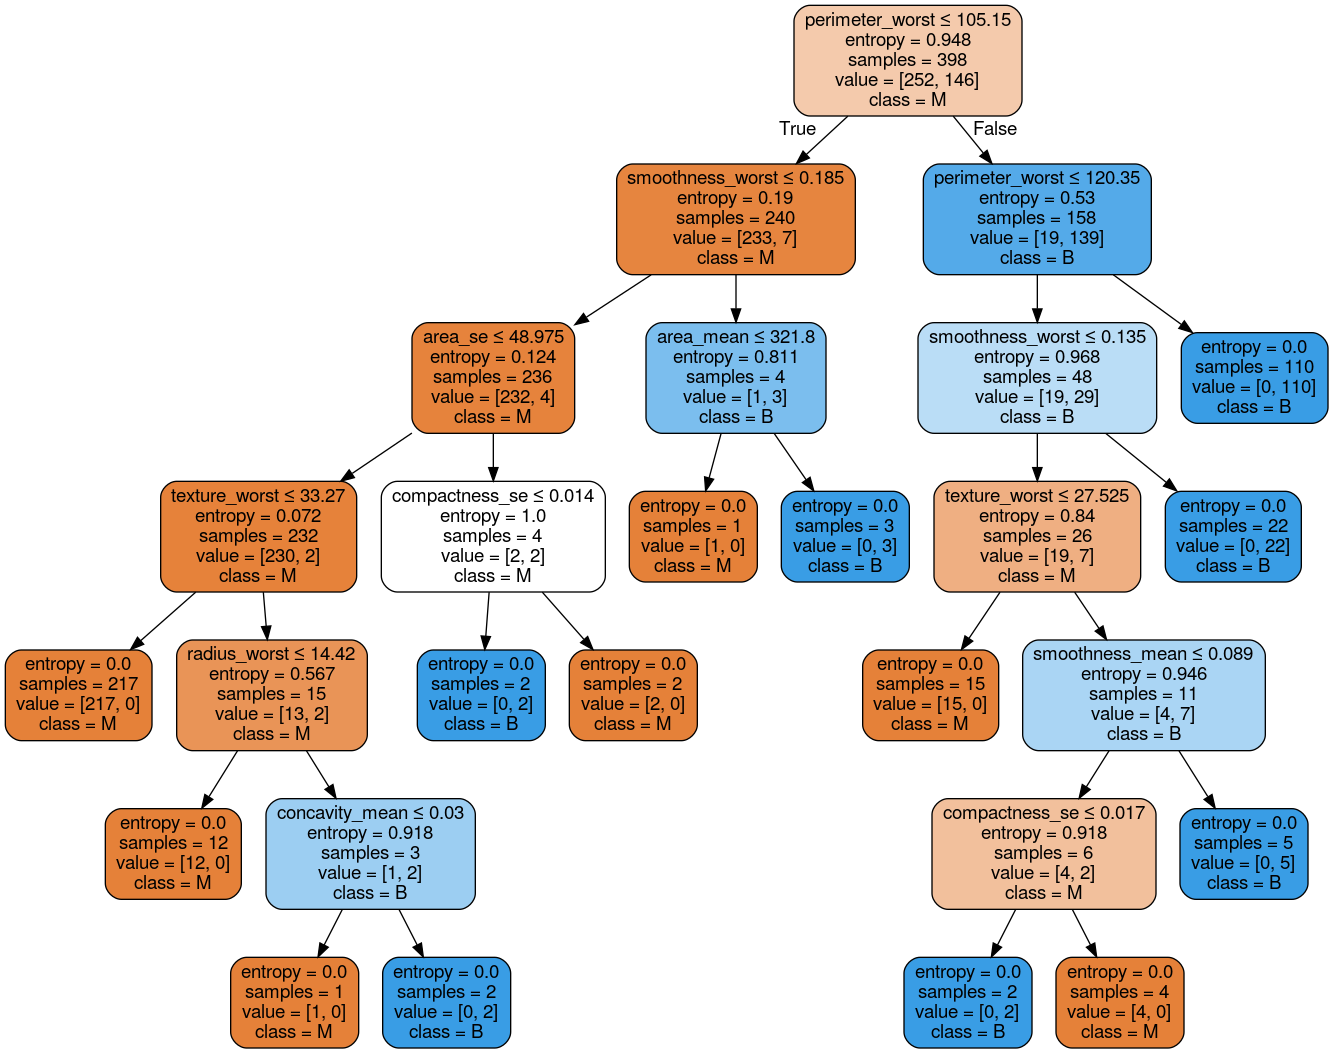

In [11]:
dot_data = StringIO()
export_graphviz(dec_tree, out_file=dot_data, feature_names=list(cancer_df.columns), class_names=list(cancer_df_t['diagnosis'].unique()),
               rounded=True, special_characters=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('results/tress_classf_cancer.png')
Image(filename='results/tress_classf_cancer.png')

Predicting new values

In [12]:
id_to_pred_1 = x_te.loc[88143502]
print('For patient 88143502, predicted diagnosis is:', dec_tree.predict(list(id_to_pred_1.values.reshape(1, -1)))[0])
print('The real value for 88143502 is:', y_te.loc[88143502].values[0])
id_to_pred_2 = x_te.loc[848406]
print('For patient 848406, predicted diagnosis is:', dec_tree.predict(list(id_to_pred_2.values.reshape(1, -1)))[0])
print('The real value for 848406 is:', y_te.loc[848406].values[0])

For patient 88143502, predicted diagnosis is: B
The real value for 88143502 is: B
For patient 848406, predicted diagnosis is: M
The real value for 848406 is: M


We can check how is the model modifying the depht of the tree

Depth of 1: 0.871
Depth of 2: 0.871
Depth of 3: 0.930
Depth of 4: 0.930
Depth of 5: 0.906
Depth of 6: 0.930


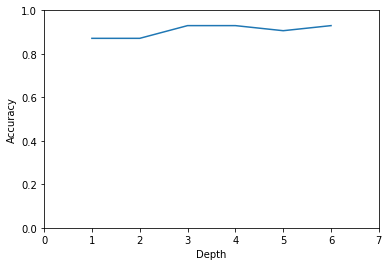

In [13]:
scores = []
for depth in range(1, 7):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf = clf.fit(x_tr, y_tr)
    acc = clf.score(x_te, y_te)
    print('Depth of %i: %0.3f' %(depth, acc))
    scores.append(acc)

plt.plot(range(1, 7), scores)
plt.axis([0, 7, 0, 1])
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.show()

With a depth of 3 or 4 our model has a good acurracy

### Features

In [14]:
cols_features = list(cancer_df.columns)
impt_features = list(dec_tree.feature_importances_)
print('### IMPORTANCE OF FEATURES ###\n')
for col, imp in zip(cols_features, impt_features):
    print(col + ':', '{:0.3f}'.format(imp))
    

### IMPORTANCE OF FEATURES ###

radius_mean: 0.000
texture_mean: 0.000
perimeter_mean: 0.000
area_mean: 0.009
smoothness_mean: 0.013
compactness_mean: 0.000
concavity_mean: 0.007
concave points_mean: 0.000
symmetry_mean: 0.000
fractal_dimension_mean: 0.000
radius_se: 0.000
texture_se: 0.000
perimeter_se: 0.000
area_se: 0.023
smoothness_se: 0.000
compactness_se: 0.025
concavity_se: 0.000
concave points_se: 0.000
symmetry_se: 0.000
fractal_dimension_se: 0.000
radius_worst: 0.015
texture_worst: 0.052
perimeter_worst: 0.756
area_worst: 0.000
smoothness_worst: 0.100
compactness_worst: 0.000
concavity_worst: 0.000
concave points_worst: 0.000
symmetry_worst: 0.000
fractal_dimension_worst: 0.000


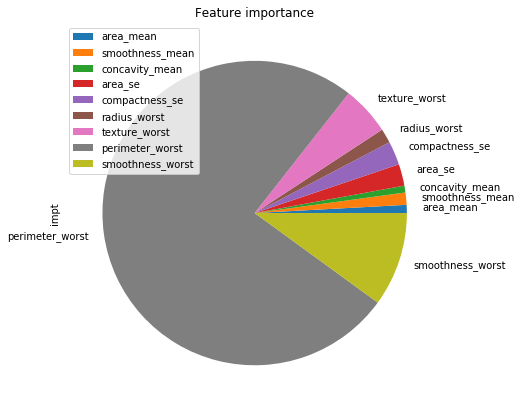

In [15]:
df_features = pd.DataFrame(data={'features': cols_features, 'impt': impt_features})
df_features = df_features.loc[df_features['impt'] != 0].reset_index(drop=True).set_index('features')
df_features.plot(y='impt', kind='pie', figsize=(7,7), title='Feature importance')

Another way to see which features are important is using a decission tree regressor

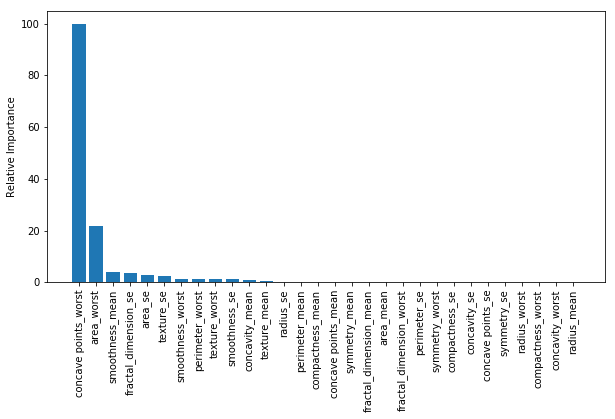

In [16]:
def feature_impt_dectreereg(x, y, depth):
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.3)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(xtr, ytr)
    list_feat_impt = model.feature_importances_
    
    # normalizar los valores 
    feature_importances = 100.0 * (list_feat_impt / max(list_feat_impt))

    # ordenar por orden de importancia
    index_sorted = np.flipud(np.argsort(feature_importances))

    # obtener porcentaje de importancia
    pos = np.arange(index_sorted.shape[0])

    # pintar la barra con el porcentaje
    plt.figure(figsize=(10,5))
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, x.columns[index_sorted], rotation='vertical')
    plt.ylabel('Relative Importance')
    plt.show()
cancer_df_t['diagnosis'] = cancer_df_t['diagnosis'].replace({'M': 1, 'B': 0})
feature_impt_dectreereg(cancer_df, cancer_df_t, 10)

## Randow Forest Classifier

This is an example of another classifier based on decissions trees

In [17]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=10)
forest.fit(x_tr, y_tr)

print("Accuracy on training set: {:.3f}".format(forest.score(x_tr, y_tr)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_te, y_te)))

Accuracy on training set: 1.000
Accuracy on test set: 0.959


In [18]:
cols_features = list(cancer_df.columns)
impt_features = list(forest.feature_importances_)
print('### IMPORTANCE OF FEATURES ###\n')
for col, imp in zip(cols_features, impt_features):
    print(col + ':', '{:0.3f}'.format(imp))

### IMPORTANCE OF FEATURES ###

radius_mean: 0.050
texture_mean: 0.016
perimeter_mean: 0.054
area_mean: 0.051
smoothness_mean: 0.007
compactness_mean: 0.022
concavity_mean: 0.029
concave points_mean: 0.073
symmetry_mean: 0.004
fractal_dimension_mean: 0.005
radius_se: 0.010
texture_se: 0.006
perimeter_se: 0.018
area_se: 0.031
smoothness_se: 0.004
compactness_se: 0.005
concavity_se: 0.010
concave points_se: 0.005
symmetry_se: 0.008
fractal_dimension_se: 0.003
radius_worst: 0.141
texture_worst: 0.023
perimeter_worst: 0.159
area_worst: 0.096
smoothness_worst: 0.018
compactness_worst: 0.007
concavity_worst: 0.030
concave points_worst: 0.107
symmetry_worst: 0.005
fractal_dimension_worst: 0.004


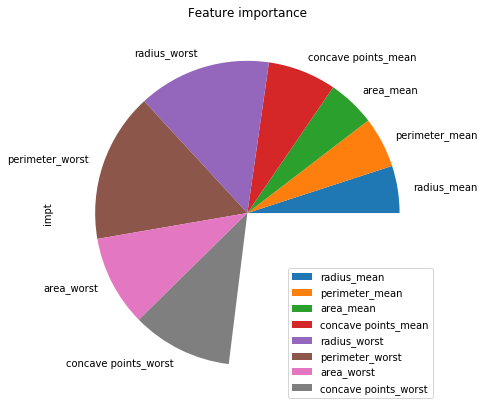

In [19]:
df_features = pd.DataFrame(data={'features': cols_features, 'impt': impt_features})
df_features = df_features.loc[df_features['impt'] > 0.05].reset_index(drop=True).set_index('features')
df_features.plot(y='impt', kind='pie', figsize=(7,7), title='Feature importance')

Instead of the simple decission tree this requires more features to explain the data.